In [3]:
import pandas as pd

# The file_path variable holds the path to the CSV file containing customer data. 
# The r before the string signifies a raw string, which treats backslashes in file paths correctly.
# The pd.read_csv() function reads the CSV file and loads it into a pandas DataFrame called data. This allows the data to be processed further.
# Load the data from the specified file path
file_path = r"C:\Users\User\Downloads\customers_data.csv"  
data = pd.read_csv(file_path)


# This line prints the current column names of the DataFrame before any cleaning is done. 
# It helps you inspect and compare the column names before modifications are applied.
print("Columns before cleaning:", data.columns)

# This line is used to clean the column names of the DataFrame by:
# .str.strip() removes any leading or trailing spaces from the column names.
#.str.lower() converts all column names to lowercase, ensuring consistency.
#.str.replace(' ', '_') replaces spaces in column names with underscores (_) for better readability and easier reference.
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')
print("Columns after cleaning:", data.columns)

# This drops any duplicate rows in the DataFrame, ensuring that only unique rows remain. 
# If there are any rows where every value is identical to another, they are removed.
data = data.drop_duplicates()

# Handle missing values and other columns cleaning

# Checks if the 'company_profit' column exists.
# If the column is present, it fills any missing values (NaN) in that column with the mean of the existing values. 
# This is done using .fillna(data['company_profit'].mean()).
# If the 'company_profit' column is absent, it prints a message indicating that the column is missing.
if 'company_profit' in data.columns:
    data['company_profit'] = data['company_profit'].fillna(data['company_profit'].mean())
else:
    print("'company_profit' column not found in the dataset.")

# Similar to the previous step, this checks if the 'company_name' column exists.
# If it does, missing values are replaced with the string 'Unknown'. This ensures that there are no missing values in the 'company_name' column.
if 'company_name' in data.columns:
    data['company_name'] = data['company_name'].fillna('Unknown')

# If the 'company_name' column exists, it removes any special characters using the regular expression r'[^\w\s]', which matches anything that isn't a word character or space.
# It then strips any leading or trailing spaces from the values in the 'company_name' column using .str.strip().
if 'company_name' in data.columns:
    data['company_name'] = data['company_name'].str.replace(r'[^\w\s]', '', regex=True)  
    data['company_name'] = data['company_name'].str.strip() 

# This checks if the 'address' column exists in the DataFrame.
# If it does, it:
# Strips any leading or trailing spaces from the address using .str.strip().
# Capitalizes the first letter of each word in the address using .str.title(), making the address look more uniform.
if 'address' in data.columns:
    data['address'] = data['address'].str.strip().str.title()

# If the 'company_profit' column exists, this line converts the values in that column to numeric values (either integers or floats).
# Any non-numeric values that cannot be converted (e.g., text or special characters) are replaced with NaN due to errors='coerce'.
if 'company_profit' in data.columns:
    data['company_profit'] = pd.to_numeric(data['company_profit'], errors='coerce')  

# This line removes any rows that contain missing values (NaN) in any column. After this step, only rows with complete data remain in the DataFrame.
data = data.dropna()

#This block checks whether the columns 'quantity', 'unit_price', and 'transaction_amount' exist in the dataset.
# If all three columns are present:
# It calculates the 'calculated_transaction_amount' by multiplying 'quantity' and 'unit_price'.
# A new column 'transaction_amount_valid' is created to check whether the actual 'transaction_amount' matches the calculated value.
# It prints any rows where the actual transaction amount doesn't match the calculated one, indicating potential data issues.
# If any of the required columns are missing, it prints an error message.
if 'quantity' in data.columns and 'unit_price' in data.columns and 'transaction_amount' in data.columns:
    # Check if transaction_amount is the product of quantity and unit_price
    data['calculated_transaction_amount'] = data['quantity'] * data['unit_price']
    data['transaction_amount_valid'] = data['transaction_amount'] == data['calculated_transaction_amount']
    # Display a few rows where the transaction amount does not match the calculated one
    print("Rows where transaction amount doesn't match the calculated value:")
    print(data[data['transaction_amount_valid'] == False][['quantity', 'unit_price', 'transaction_amount', 'calculated_transaction_amount']])
else:
    print("Missing 'quantity', 'unit_price', or 'transaction_amount' columns in the dataset.")

# This checks if the 'feedback_comment' and 'satisfaction_score' columns exist.
# If they do, it validates that the satisfaction score is between 1 and 5 (inclusive), which is done using .between(1, 5).
# It then prints rows where the satisfaction score is invalid or missing.
if 'feedback_comment' in data.columns and 'satisfaction_score' in data.columns:
    # Example of validation: check if satisfaction_score is non-negative and falls within a valid range (e.g., 1-5)
    data['satisfaction_score_valid'] = data['satisfaction_score'].between(1, 5)
    # Display rows where feedback comments have no satisfaction score or invalid satisfaction score
    print("Rows with invalid satisfaction score or missing correspondence between feedback and satisfaction score:")
    print(data[data['satisfaction_score_valid'] == False][['feedback_comment', 'satisfaction_score']])

# This drops any columns where all values are missing (NaN). This is useful for removing columns that are completely empty and do not contribute any useful data.
data = data.dropna(axis=1, how='all')  # Drops columns with all NaN values
redundant_columns = [col for col in data.columns if data[col].nunique() == 1]  # Redundant features: columns with only one unique value
data = data.drop(columns=redundant_columns)  # Drop redundant columns
print("Redundant columns dropped:", redundant_columns)

# This saves the cleaned DataFrame to a new CSV file named 'cleaned_file.csv'.
# The index=False argument ensures that row indices are not included in the output file.
data.to_csv('cleaned_file.csv', index=False)

# This prints the first few rows of the cleaned DataFrame to give a preview of the final result, helping you confirm that the cleaning steps were successful.
print(data.head())


Columns before cleaning: Index(['Company_ID', 'Company_Name', 'Company_Profit', 'Address'], dtype='object')
Columns after cleaning: Index(['company_id', 'company_name', 'company_profit', 'address'], dtype='object')
Missing 'quantity', 'unit_price', or 'transaction_amount' columns in the dataset.
Redundant columns dropped: []
   company_id          company_name  company_profit  \
0         1.0  Tech  Enterprises  1         80701.0   
1         2.0   Global  Partners  2         80511.0   
2         3.0  Quantum Associates 3        110664.0   
3         4.0       Prime Network 4         76400.5   
4         5.0    Elite  Ventures  5         69427.0   

                                             address  
0             Edsa, Barangay 606, Pasig, Philippines  
1  Commonwealth Ave, Barangay 789, Taguig, Philip...  
2       Roxas Blvd, Barangay 505, Pasig, Philippines  
3  Alabang-Zapote Rd, Barangay 202, Taguig, Phili...  
4    Ayala Avenue, Barangay 101, Makati, Philippines  


In [7]:
import pandas as pd

# file_path: This specifies the location of your CSV file (products_data.csv) on your system.
# pd.read_csv(file_path): This loads the data from the CSV file located at file_path into a pandas DataFrame called data.
# A DataFrame is a 2D data structure similar to a table, where rows represent observations and columns represent features.
file_path = r"C:\Users\User\Downloads\products_data.csv"
data = pd.read_csv(file_path)

# This line prints the column names of the DataFrame before any cleaning. 
# It is helpful for understanding the original column structure and spotting issues such as extra spaces or inconsistent capitalization.
print("Columns before cleaning:", data.columns)

# data.columns: This refers to the column names of the DataFrame.
# str.strip(): Strips any leading and trailing spaces from each column name.
# str.lower(): Converts all column names to lowercase to maintain consistency.
# str.replace(' ', '_'): Replaces any spaces in column names with underscores (_).
# This is a common cleaning step to make the column names easier to work with programmatically (e.g., easier to reference in code without worrying about spaces or inconsistent capitalization).

data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

# This line prints the column names after cleaning, allowing you to visually confirm that the changes (lowercase, space removal, and trimming) have been applied correctly.
print("Columns after cleaning:", data.columns)


# data.drop_duplicates(): This removes any duplicate rows from the DataFrame. A row is considered a duplicate if all of its values are identical to those of another row.
# This operation ensures that your dataset only contains unique rows, preventing redundancy.
data = data.drop_duplicates()

# data['product_name']: This selects the product_name column of the DataFrame.
# fillna('Unknown'): This replaces any missing (NaN) values in the product_name column with the string 'Unknown'.
# This step ensures that no missing values exist in the product_name column.
data['product_name'] = data['product_name'].fillna('Unknown')

# data['product_price']: This selects the product_price column.
# replace(r'[^\d.]', '', regex=True): This removes any non-numeric characters (except for the decimal point) using a regular expression. ^\d. matches any character that’s not a digit (\d) or a decimal point (.).
# astype(float): After removing non-numeric characters, the column is converted to a float data type, ensuring that the values in product_price are numerical.
data['product_price'] = data['product_price'].replace(r'[^\d.]', '', regex=True).astype(float)

# This prints the first 5 entries of the product_price column after it has been cleaned. 
# It’s useful for confirming that the column now contains valid numeric values.
print(data['product_price'].head())

# dropna(subset=['product_price']): This drops any rows where the product_price column contains missing (NaN) values. 
#It ensures that your data is complete with valid prices for each product.
data = data.dropna(subset=['product_price'])

# data.to_csv('cleaned_products_data.csv'): This saves the cleaned data to a new CSV file called 'cleaned_products_data.csv'.
# index=False: This argument prevents the row indices from being written to the file. It’s useful if you don’t need the row numbers in your output file.
data.to_csv('cleaned_products_data.csv', index=False)

# This prints the first 5 rows of the cleaned data. 
# It allows you to quickly inspect the first few records and verify that the data looks correct after all the preprocessing steps.
print(data.head())



Columns before cleaning: Index(['Product_ID', 'Product_Name', 'Product_Price'], dtype='object')
Columns after cleaning: Index(['product_id', 'product_name', 'product_price'], dtype='object')
0    140000.0
1    168000.0
2    100800.0
3    123200.0
4     84000.0
Name: product_price, dtype: float64
   product_id            product_name  product_price
0         1.0      FinPredictor Suite       140000.0
1         2.0  MarketMinder Analytics       168000.0
2         3.0    TrendWise Forecaster       100800.0
3         4.0  CustomerScope Insights       123200.0
4         5.0     SalesSync Optimizer        84000.0


In [9]:
import pandas as pd

# LThe pd.read_csv() function loads the CSV file from the given file path into a pandas DataFrame (data), which is a table-like structure for data.
file_path = r"C:\Users\User\Downloads\transactions_data.csv"  
data = pd.read_csv(file_path)

# Drop the 'Unnamed: 0' column if it exists (e.g., index column) to clean up the dataset
data = data.drop(columns=['Unnamed: 0'], errors='ignore')

# The column names are cleaned by:
# Stripping any leading or trailing spaces using str.strip().
# Converting all column names to lowercase with str.lower().
# Replacing spaces with underscores using str.replace(' ', '_').
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

# The transaction_date column is converted into a proper datetime format. 
#If any entry cannot be parsed into a date (invalid format), it will be set as NaT (Not a Time) because of the errors='coerce' argument.
data['transaction_date'] = pd.to_datetime(data['transaction_date'], format='%d/%m/%Y', errors='coerce') 


# replace(r'[^\d.]', '', regex=True) removes any characters that are not digits or a period (.), effectively cleaning up non-numeric characters like currency symbols.
# After cleaning, astype(float) ensures the columns are converted to float type for further numerical analysis.
data['product_price'] = data['product_price'].replace(r'[^\d.]', '', regex=True).astype(float)
data['total_cost'] = data['total_cost'].replace(r'[^\d.]', '', regex=True).astype(float)

# This converts the quantity column to numeric. 
# Invalid entries (e.g., non-numeric values) are turned into NaN because of the errors='coerce' argument.
data['quantity'] = pd.to_numeric(data['quantity'], errors='coerce')

# Missing values (NaN) in the product_price and total_cost columns are fill ed with the mean (average) of their respective columns.
# This ensures no missing values in these crucial columns for further analysis.
data['product_price'] = data['product_price'].fillna(data['product_price'].mean())
data['total_cost'] = data['total_cost'].fillna(data['total_cost'].mean())

# Similarly, missing values in the quantity column are filled with the median of the column.
# The median is often used for filling numerical data as it is less sensitive to outliers compared to the mean.
data['quantity'] = data['quantity'].fillna(data['quantity'].median()) 

# Missing values in the product_id and company_id columns are replaced with -1. 
# This placeholder value signifies that the data for those entries was missing, but it allows analysis to continue.
data['product_id'] = data['product_id'].fillna(-1)
data['company_id'] = data['company_id'].fillna(-1)

# This drops any rows that still have missing values (NaN) in critical columns like product_id, quantity, product_price, or total_cost. 
#These are necessary for further analysis, so any rows with missing values in these columns are removed.
data = data.dropna(subset=['product_id', 'quantity', 'product_price', 'total_cost'])

# The cleaned data is saved to a new CSV file called cleaned_transactions_data.csv. 
# The index=False argument ensures that row indices (which are not needed) are not written to the file.
data.to_csv('cleaned_transactions_data.csv', index=False)

#  Finally, the first five rows of the cleaned data are printed as a preview. This gives a quick look at how the data looks after all the cleaning steps.
print(data.head())



   transaction_id  company_id  product_id  quantity transaction_date  \
0             1.0        88.0         6.0      11.0              NaT   
1             2.0        29.0        19.0      16.0              NaT   
2             NaN        28.0        18.0       6.0              NaT   
3             4.0        85.0        12.0      12.0              NaT   
4             5.0        47.0         3.0       8.0       2021-06-07   

   product_price  total_cost  
0  194379.147964   1075200.0  
1   97930.993380   1428000.0  
2  126095.547778    940800.0  
3  134652.802537   1008000.0  
4   99575.609634    705600.0  


In [23]:
# Import necessary libraries for data splitting, creating the linear regression model, and evaluating the model.
# train_test_split will help us divide the data into training and testing sets,
# LinearRegression will allow us to create the regression model,
# and mean_squared_error and r2_score will help evaluate the model’s performance.

from sklearn.model_selection import train_test_split  # For splitting data into train/test sets
from sklearn.linear_model import LinearRegression  # For creating a linear regression model
from sklearn.metrics import mean_squared_error, r2_score  # For model evaluation

# Define the feature columns (input variables) and the target column (output we want to predict).
# 'product_price' and 'quantity' are the features we will use to predict the 'total_cost'.
# Ensure the column names match the ones in the data (lowercase).
feature_columns = ['product_price', 'quantity']
target = 'total_cost'

# Now, we need to handle missing values. 
# We drop any rows in the dataset where there are missing values in any of the feature columns or the target column.
# This is because missing values in these columns will prevent the model from training correctly.

data = data.dropna(subset=feature_columns + [target])  # Drop rows where any of the selected columns has a missing value

# After dropping rows with missing values, we separate the features (X) and the target (y).
# X (features) will contain the columns 'product_price' and 'quantity', which are the inputs the model will use for prediction.
# y (target) will contain the 'total_cost', which is the value we want the model to predict.
X = data[feature_columns]  # Select input features for the model
y = data[target]  # Select the target variable (the output)

# Now, we split the data into two sets: a training set (80%) and a testing set (20%).
# This is done using the train_test_split function. The training data will be used to train the model,
# and the testing data will be used to evaluate how well the model generalizes to new, unseen data.
# random_state=42 ensures that the split is reproducible every time the code is run.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Next, we create the linear regression model.
# Linear regression is a method used to model the relationship between a dependent variable (total_cost) 
# and one or more independent variables (product_price, quantity).
model = LinearRegression()

# We train the model using the training data (X_train, y_train). 
# The .fit() method finds the best-fitting line that minimizes the error between the predicted and actual values of 'total_cost'.
model.fit(X_train, y_train)

# After the model has been trained, we use the trained model to make predictions.
# We use the testing data (X_test) to predict the total_cost values for the test set.
# The predictions will be stored in y_pred.
y_pred = model.predict(X_test)

# Now that we have the predictions, we evaluate the performance of the model.
# We will calculate two important metrics: 
# 1. Mean Squared Error (MSE) - Measures the average squared difference between actual and predicted values. 
# A lower MSE indicates a better model.
# 2. R-squared (R²) - Indicates how well the model fits the data. R² ranges from 0 to 1, where 1 indicates that the model explains all the variability in the target variable.

mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
r2 = r2_score(y_test, y_pred)  # Calculate R-squared

# Print the evaluation metrics to assess the model's performance.
# A good model would have a low MSE and a high R² score (closer to 1).
print("Mean Squared Error (MSE):", mse)  # Display MSE
print("R-squared (R²) score:", r2)  # Display R-squared

# After evaluating the model, we can print the coefficients and intercept of the trained model.
# The coefficients represent the strength and direction of the relationship between each feature and the target.
# For example, if 'product_price' has a larger coefficient than 'quantity', it means that the price has a stronger influence on the total cost.
# The intercept is the constant term in the linear equation that represents the value of 'total_cost' when all features are 0.
print("Coefficients:", model.coef_)  # Display the coefficients of the features
print("Intercept:", model.intercept_)  # Display the intercept of the regression line

# Finally, we can display the first 10 predicted values of the target variable (total_cost) from the test set.
# This gives us a quick look at how well the model is predicting the total cost based on the features.
print("Predicted Total Costs:", y_pred[:10])  # Display the first 10 predicted values


Mean Squared Error (MSE): 192672964280.25702
R-squared (R²) score: 0.745542140300137
Coefficients: [9.12097423e+00 1.18958533e+05]
Intercept: -1062877.0719371818
Predicted Total Costs: [1122168.70704392 1255689.44113478 1362109.7474575   539577.64523621
 1711748.60328938 1474420.58033061  906299.91328055  889041.85032608
 2076130.07986149 1174953.39103753]


Accuracy: 0.49507389162561577
Confusion Matrix:
 [[ 88  71]
 [749 716]]
Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.55      0.18       159
           1       0.91      0.49      0.64      1465

    accuracy                           0.50      1624
   macro avg       0.51      0.52      0.41      1624
weighted avg       0.83      0.50      0.59      1624

ROC AUC Score: 0.5137999871208706
F1 Score: 0.6358792184724689
Precision-Recall AUC: 0.9062852114770883
Coefficients: [[2.24388365e-06 6.28952047e-03]]
Intercept: [-0.36433026]
Predicted Probabilities of Purchase: [0.5243433  0.50187115 0.48354014 0.52274706 0.53835797 0.48624584
 0.51414635 0.47108297 0.50115768 0.4868922 ]


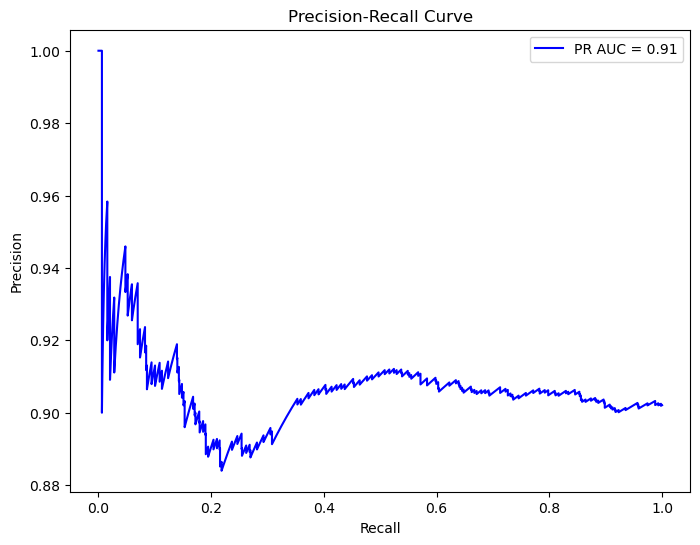

Adjusted F1 Score with Threshold 0.7: 0.0


In [25]:
# Importing the necessary libraries
# pandas is used for data manipulation and loading datasets
# train_test_split from sklearn.model_selection is used to split the dataset into training and testing sets
# LogisticRegression is the model we are using to perform binary classification
# various metrics are imported for model evaluation: accuracy_score, confusion_matrix, classification_report, etc.
# matplotlib.pyplot is used for plotting the precision-recall curve

import pandas as pd  # For data manipulation
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.linear_model import LogisticRegression  # Logistic Regression model for classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, f1_score, precision_recall_curve, auc  # Metrics to evaluate the model
import matplotlib.pyplot as plt  # For plotting graphs

# Load the dataset from a CSV file
# The path to the dataset file is specified. Make sure to update the path if needed.
data = pd.read_csv(r"C:\Users\User\Downloads\transactions_data.csv")

# Creating a new column 'Purchased' where the target is binary:
# If 'Total_Cost' is greater than 0, the person made a purchase (1), otherwise no purchase (0).
# This is done by checking if 'Total_Cost' > 0 and converting the result into an integer (1 or 0).
data['Purchased'] = (data['Total_Cost'] > 0).astype(int)

# Define feature columns (inputs to the model) and the target column (output we want to predict).
# 'Product_Price' and 'Quantity' will be used to predict whether or not a customer made a purchase.
# The target variable is the 'Purchased' column we just created.
feature_columns = ['Product_Price', 'Quantity']
target = 'Purchased'

# Handle missing values: drop rows where any of the feature columns or the target column have missing values.
# It's essential to have complete data for training the model.
data = data.dropna(subset=feature_columns + [target])

# Now, we separate the data into features (X) and the target variable (y).
# X contains the features (inputs) for the model, which are 'Product_Price' and 'Quantity'.
# y contains the target variable ('Purchased'), which we are trying to predict.
X = data[feature_columns]  # Features (input data)
y = data[target]  # Target variable (output we want to predict)

# Split the dataset into training and testing sets.
# 80% of the data will be used for training the model, and 20% will be used for testing.
# The 'random_state' ensures that the split is reproducible, meaning you'll get the same split every time you run the code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model with class weights balanced.
# Using class_weight='balanced' helps handle class imbalance, where one class (like no purchase) might be underrepresented.
# This way, the model compensates by adjusting for the imbalance during training.
model = LogisticRegression(class_weight='balanced')

# Train the model using the training data (X_train and y_train).
# The .fit() method trains the logistic regression model to learn the relationship between the features and the target variable.
model.fit(X_train, y_train)

# Make predictions using the trained model.
# We use the test data (X_test) to make predictions on whether a customer will purchase (0 or 1).
y_pred = model.predict(X_test)

# In addition to hard predictions (y_pred), we also obtain the probabilities of the predictions.
# The model returns the probability of the positive class (purchase = 1), which we store in y_pred_prob.
# The probabilities will be used to calculate metrics like ROC-AUC and precision-recall.
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Now, we evaluate the model using different performance metrics:
# Accuracy: The fraction of correctly classified instances out of all instances.
accuracy = accuracy_score(y_test, y_pred)

# Confusion Matrix: Shows the number of correct and incorrect predictions broken down by each class (0 or 1).
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report: Provides precision, recall, f1-score, and support for each class.
class_report = classification_report(y_test, y_pred)

# ROC AUC Score: The area under the Receiver Operating Characteristic curve. 
# This metric evaluates how well the model distinguishes between the two classes.
roc_auc = roc_auc_score(y_test, y_pred_prob)

# F1 Score: A balance between precision and recall. It's useful when we want to balance the two metrics.
f1 = f1_score(y_test, y_pred)

# Precision-Recall curve: A plot that shows the trade-off between precision and recall at different threshold values.
# The precision_recall_curve function returns the precision, recall, and thresholds at each possible decision threshold.
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Precision-Recall AUC: The area under the precision-recall curve. A higher score indicates better model performance.
pr_auc = auc(recall, precision)

# Print out all the evaluation metrics we have calculated
# This will help us understand how well our model is performing in terms of accuracy, class balance, and AUC scores.
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)
print("F1 Score:", f1)
print("Precision-Recall AUC:", pr_auc)

# Display the model's coefficients and intercept
# The coefficients represent how much each feature (Product_Price and Quantity) influences the target (Purchased).
# The intercept is the constant value that would be added to the linear combination of features to calculate the output.
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Show the first 10 predicted probabilities of purchase.
# These probabilities represent the likelihood that each instance in the test set will have a purchase (1).
print("Predicted Probabilities of Purchase:", y_pred_prob[:10])

# Plot the Precision-Recall curve
# This is a valuable visualization that shows how precision and recall change with varying thresholds.
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')  # Label for the x-axis
plt.ylabel('Precision')  # Label for the y-axis
plt.title('Precision-Recall Curve')  # Title of the plot
plt.legend(loc="best")  # Display legend in the best location
plt.show()

# Optionally, adjust the classification threshold to make the decision boundary more or less strict.
# The default threshold is 0.5, but we can adjust it to be more conservative or lenient.
# For example, with a threshold of 0.7, we predict "purchase" (1) only if the model's probability of purchase is greater than 0.7.
threshold = 0.7
y_pred_adjusted = (y_pred_prob > threshold).astype(int)

# Recalculate the F1 score after adjusting the threshold.
# This will help us understand how the model's performance changes when we change the decision boundary.
adjusted_f1 = f1_score(y_test, y_pred_adjusted)
print("Adjusted F1 Score with Threshold 0.7:", adjusted_f1)
